In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv("C:/Users/vaish/Downloads/marketing_campaign.csv", sep='\t')

print(df.head())




     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [29]:

data = df[['Income', 'Recency', 'MntWines', 'MntFruits', 
           'MntMeatProducts', 'MntFishProducts']].copy()
data.dropna(inplace=True)


In [31]:
data['Spending'] = data[['MntWines', 'MntFruits', 
                         'MntMeatProducts', 'MntFishProducts']].sum(axis=1)

data = data[['Income', 'Recency', 'Spending']]


In [33]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


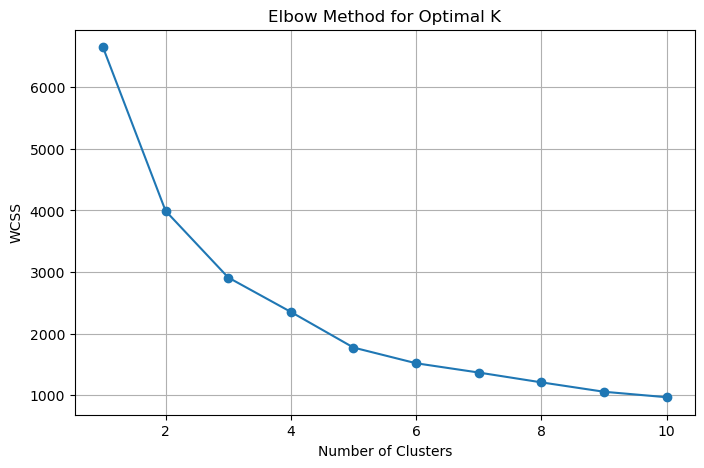

In [35]:
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


In [37]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data['Cluster'] = clusters


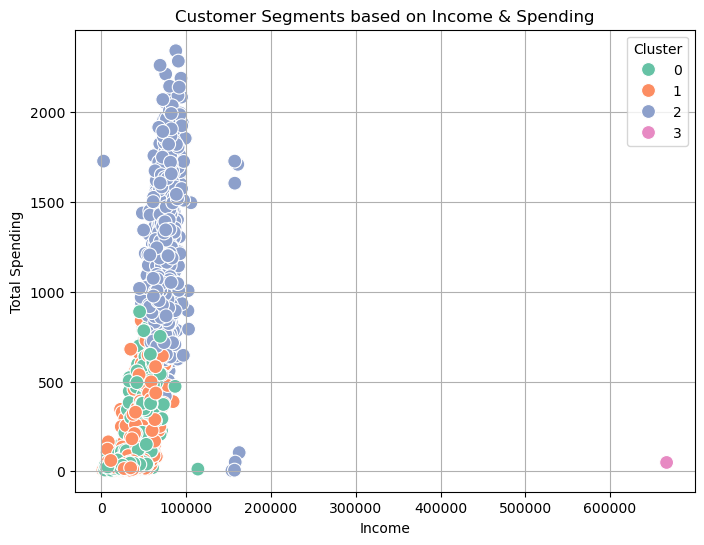

In [39]:
# Scatter plot of clusters by Income and Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Income', y='Spending', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments based on Income & Spending")
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()
